In [1]:
import nltk

In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [4]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no, message,'\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1 ham	Ok lar... Joking wif u oni... 

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3 ham	U dun say so early hor... U c already then say... 

4 ham	Nah I don't think he goes to usf, he lives around here though 

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv 

6 ham	Even my brother is not like to speak with me. They treat me like aids patent. 

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [19]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [29]:
messages.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

In [26]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


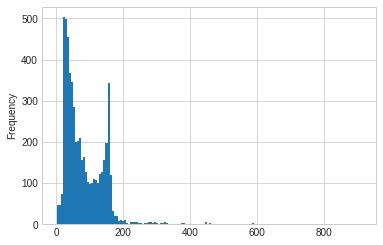

In [30]:
messages['length'].plot(kind='hist', bins=150)

In [31]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [34]:
messages[messages['length'] ==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7f63df128>,
      dtype=object)

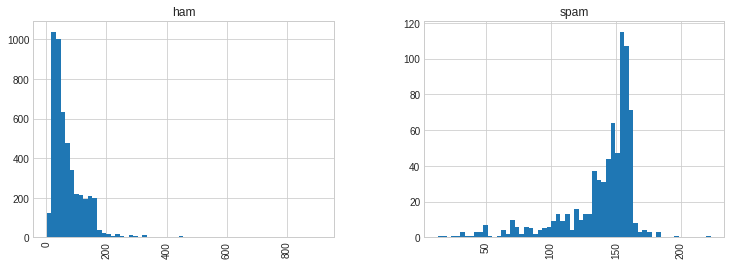

In [37]:
messages.hist(column='length',by='label',bins=60, figsize=(12,4))

In [48]:
import string
from nltk.corpus import stopwords

In [57]:
mess = 'Sample message! Notice: it has punctuation'
nopunc = [c for c in mess if c not in string.punctuation]
nopunc = ''.join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [58]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [62]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [69]:
def text_process(mess):
    """
    1. Remove punc
    2. Remove stop words
    3. Return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]

In [70]:
messages['message'].head(5).apply(text_process)

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, i, dont, think, goes, usf, lives, around...
Name: message, dtype: object

In [71]:
# Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
bow = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [73]:
print(len(bow.vocabulary_))

9646


In [74]:
mess4 = messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [77]:
bow4 = bow.transform([mess4])
print(bow4)

  (0, 1135)	1
  (0, 1931)	1
  (0, 3031)	1
  (0, 3053)	1
  (0, 4260)	1
  (0, 7282)	2
  (0, 8718)	2


In [78]:
bow4.shape

(1, 9646)

In [80]:
bow.get_feature_names()[8718]

'u'

In [82]:
messages_bow = bow.transform(messages['message'])

In [91]:
messages_bow.nnz, (messages_bow.shape[0] * messages_bow.shape[1])

(55573, 53747512)

In [92]:
print('Shape of sparse matrix: ',messages_bow.shape)
sparsity = (100 * messages_bow.nnz/ (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity :',sparsity)

Shape of sparse matrix:  (5572, 9646)
sparsity : 0.10339641395865914


In [95]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [97]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 8718)	0.31949158769666564
  (0, 7282)	0.5597000940482765
  (0, 4260)	0.46452762500729494
  (0, 3053)	0.33557436526898854
  (0, 3031)	0.30912546538910485
  (0, 1931)	0.2870370340589675
  (0, 1135)	0.27985004702413824


In [98]:
tfidf_transformer.idf_[bow.vocabulary_['university']]

8.239394426449646

In [99]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [100]:
# Train a machine learning algorithom
from sklearn.naive_bayes import MultinomialNB
spam_detect = MultinomialNB().fit(messages_tfidf,messages['label'])

In [101]:
spam_detect.predict(tfidf4)

array(['ham'], dtype='<U4')

In [102]:
messages['label'][3]

'ham'

In [103]:
all_pred = spam_detect.predict(messages_tfidf)

In [104]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(messages['message'],messages['label'],test_size=0.3,random_state=0)

In [105]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
        ('bow',CountVectorizer(analyzer=text_process)),
        ('tfidfi',TfidfTransformer()),
        ('classifier', MultinomialNB())
        ])

In [106]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7fc7f615c6a8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [107]:
predictions = pipeline.predict(X_test)

In [108]:
from sklearn.metrics import classification_report
print('classification_report\n',classification_report(y_test,predictions))

classification_report
              precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1451
       spam       1.00      0.73      0.85       221

avg / total       0.97      0.96      0.96      1672



## Natural Language Processing Project Overview

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.

In [111]:
df = pd.read_csv('yelp.csv')
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [113]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [115]:
df['length'] = df['text'].apply(len)

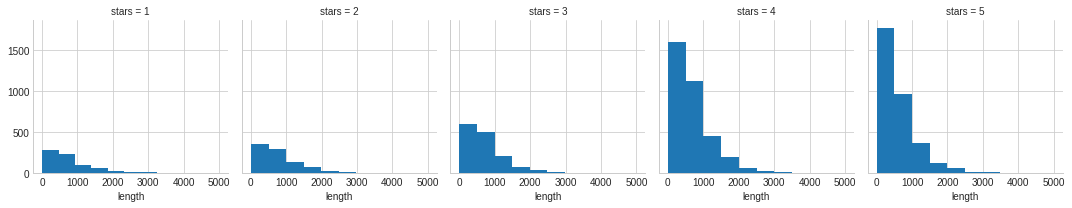

In [122]:
g = sns.FacetGrid(df,col='stars')
g.map(plt.hist,'length')

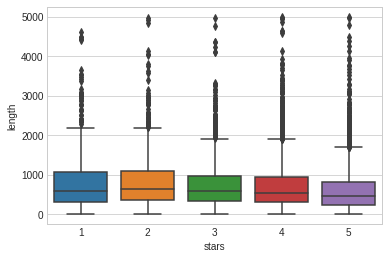

In [126]:
sns.boxplot(x='stars', y='length',data=df)

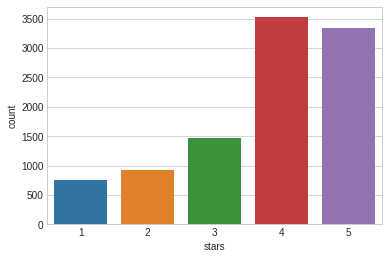

In [128]:
sns.countplot(x='stars',data=df)

In [130]:
df.groupby('stars').mean()

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [132]:
cor = df.corr()
cor

,stars,cool,useful,funny,length
stars,1.000000,0.052555,-0.023479,-0.061306,-0.114674
cool,0.052555,1.000000,0.887102,0.764342,0.241451
useful,-0.023479,0.887102,1.000000,0.723406,0.293975
funny,-0.061306,0.764342,0.723406,1.000000,0.251760
length,-0.114674,0.241451,0.293975,0.251760,1.000000


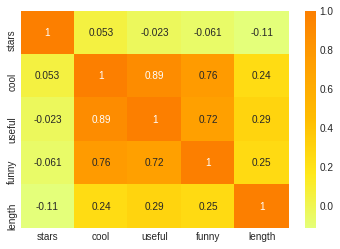

In [136]:
sns.heatmap(cor,annot=True,cmap='Wistia')

In [138]:
X = df['text']
y = df['stars']

In [139]:
# Preprocessing
bow = CountVectorizer().fit_transform(X)

In [141]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(bow,y, test_size=0.3,random_state=0)

In [142]:
#Model
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [146]:
# Prediction and evaluations
y_pred = classifier.predict(X_test)
print('classification_report\n',classification_report(y_test,y_pred))

classification_report
              precision    recall  f1-score   support

          1       0.67      0.27      0.38       222
          2       0.21      0.04      0.07       272
          3       0.25      0.07      0.11       435
          4       0.42      0.71      0.53      1051
          5       0.60      0.57      0.58      1020

avg / total       0.46      0.47      0.43      3000



# Great Job